In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colos as colors
import matplotlib.lines as mlines
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [ ]:
#paths to integrate this notebook into new organized workflow


non_equilibrium_1d_vdos _path = "/run-NPT_non_equil_300K/1D_vdos/output"
equilibrium_1d_vdos_path = "/run-NPT_equil_300K/1D_vdos/output"
eigenvalues_from_equil_path = "/run-NPT_equil_300K/eval_ave_output.mmat.dat"
#water



In [101]:
# Add average temperature lines and legends
non_equil_T = 326.762
equil_T = 299.944

t_equil = 299.944
t_non_equil = 326.762
kb = 1.380649 * (10**-23)
n_atoms = 1231
normalization_target = 3 * n_atoms

def freq_resolution_cm(timestep_fs, corr_len, sym=True):
    c = 2.99792458e10  # speed of light in cm/s
    T = timestep_fs * 1e-15 * corr_len
    df = 1 / T / c
    return df / 2 if sym else df

freq_res = freq_resolution_cm(4, 500)


# Function to process data from a single file
def process_data(file_path):
    data = pd.read_csv(file_path, delim_whitespace=True, header=None).sum(axis=1).to_numpy()
    integral = np.sum(data) * fRes
    normalization_factor = normalization_target / integral
    data = data * normalization_factor
    data = np.array([(i * fRes, data[i]) for i in range(len(data))])
    return data

def Read_Two_Column_File(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            y.append(float(p[1]))

    return x, y

def normalize_to_target(lst, target_sum):
    total = sum(lst)
    return [x * (target_sum / total) for x in lst]

def plot_mmat_energy(ax, mmat_data, eigenvalues, eval_index=0, color="black",legend=False,yaxis=False,eigen=True):
    # Constants and scaling
    scaling_factor = 10 / (8.3145 * (2500000 ** 2) * (2 * 500 - 1))
    energy_in_each_mode = [(2 * np.sum(mode) - mode[0]) * scaling_factor for mode in mmat_data[1:]]
    selected_eigenvalues = eigenvalues[eval_index]

    # Plot energy as a solid color
    ax.plot(range(len(energy_in_each_mode)), energy_in_each_mode[:len(selected_eigenvalues)], 'o', color=color)

    # Add equilibrium and non-equilibrium temperature lines
    non_equil_T = 326.762
    equil_T = 299.944
    #equil_line = ax.axhline(y=equil_T, color='blue', linestyle='--', label="Ave. Equil Temp")
    #non_equil_line = ax.axhline(y=non_equil_T, color='orange', linestyle='--', label="Ave. Non Equil Temp")


    
    # Create legend markers
    blue_dot = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label='Equilibrium System')
    red_dot = mlines.Line2D([], [], color='orangered', marker='o', linestyle='None', markersize=10, label='Nonequilibrium System')
    eigen_dot = mlines.Line2D([], [], color='black', marker='none', linestyle='-', markersize=10, label="Eigenvalues")

    
    # Add legend
    if legend==True:
        ax.legend(handles=[blue_dot, red_dot, equil_line, non_equil_line, eigen_dot], loc="upper center", fontsize=24)

    
        
    if yaxis==True:
        # Labels and title
        #ax.set_title("200 $cm^{-1}$", fontsize=32)
        ax.set_xlabel("Mode #", fontsize=32)
        ax.set_ylabel("Temperature (K)", fontsize=32)
        
        
    # Create secondary y-axis for eigenvalues
        ax2.set_ylabel("Contrib. to VDoS", fontsize=32, color='black')

    ax.set_ylim(275, 350)
    ax.tick_params(axis='both', which='major', labelsize=28)

    if eigen==True:
        selected_eigenvalues = [val / max(selected_eigenvalues) for val in selected_eigenvalues]
        ax2 = ax.twinx()
        ax2.plot(range(len(selected_eigenvalues[:1000])), selected_eigenvalues[:1000], color='black', label="Eigenvalues", linewidth = 4)        
        ax2.tick_params(axis='y', labelsize=28, colors='black')
        return ax, ax2
    else:
        return ax







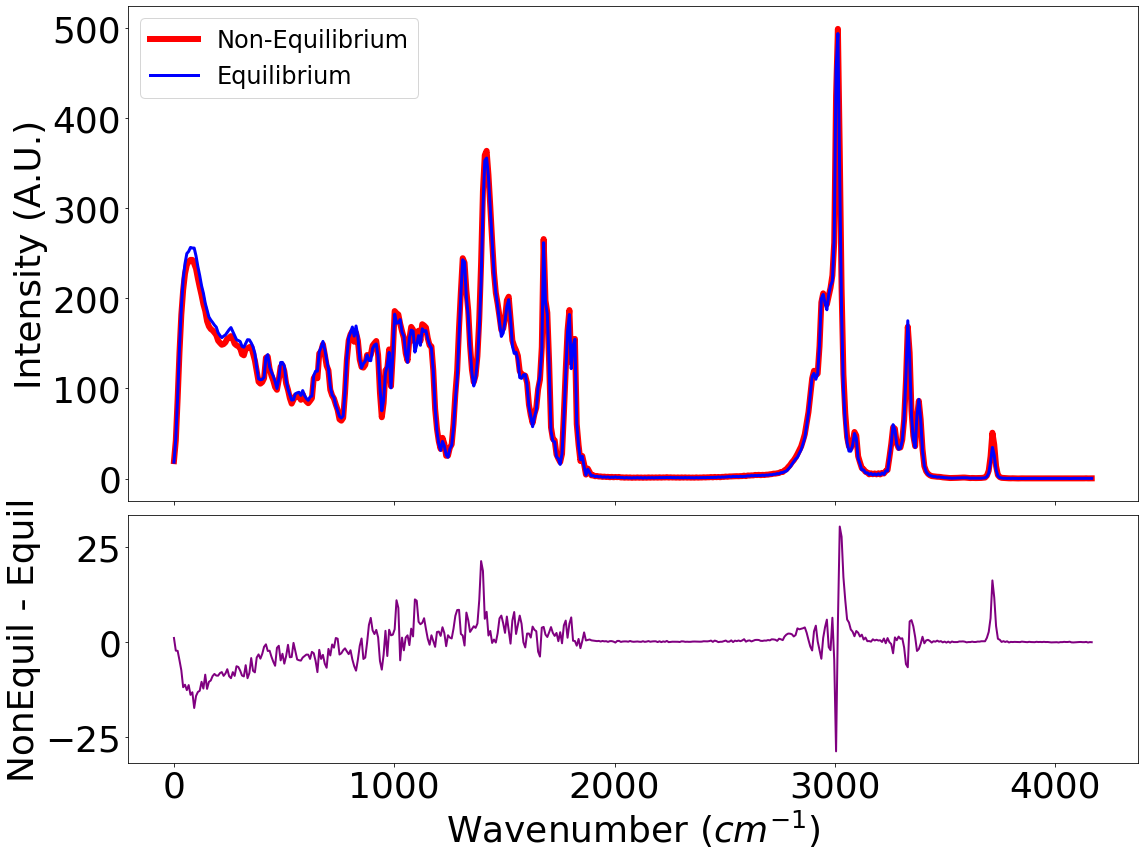

In [102]:
equil_data = Read_Two_Column_File('/Users/bdneff/Downloads/non_equil_project/flex_water/tip4p/VDOS/equil_VDOS.dat')
norm_equil_data = normalize_to_target(equil_data[1], normalization_target*10)
non_equil_data = Read_Two_Column_File('/Users/bdneff/Downloads/non_equil_project/flex_water/tip4p/VDOS/non_equil_VDOS.dat')
norm_non_equil_data = normalize_to_target(non_equil_data[1], normalization_target*10)

# Compute difference
difference = np.subtract(norm_non_equil_data, norm_equil_data)

# Create a two-panel figure
fig, axs = plt.subplots(2, 1, figsize=(16, 12), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# First panel: Equilibrium and Non-Equilibrium VDOS
axs[0].plot(non_equil_data[0], norm_non_equil_data, color='red', label='Non-Equilibrium', linewidth=6)
axs[0].plot(equil_data[0], norm_equil_data, color='blue', label='Equilibrium', linewidth=3)
axs[0].legend(fontsize=24, loc='upper left')
axs[0].set_ylabel("Intensity (A.U.)", fontsize=36)
axs[0].tick_params(axis='both', labelsize=36)

# Second panel: Difference in VDOS
axs[1].plot(equil_data[0], difference, color='purple', linewidth = 2)
axs[1].set_ylabel("NonEquil - Equil", fontsize=36)
axs[1].set_xlabel("Wavenumber ($cm^{-1}$)", fontsize=36)
axs[1].tick_params(axis='both', labelsize=36)

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('/Users/bdneff/Desktop/VDOS_combined.png', dpi=250)


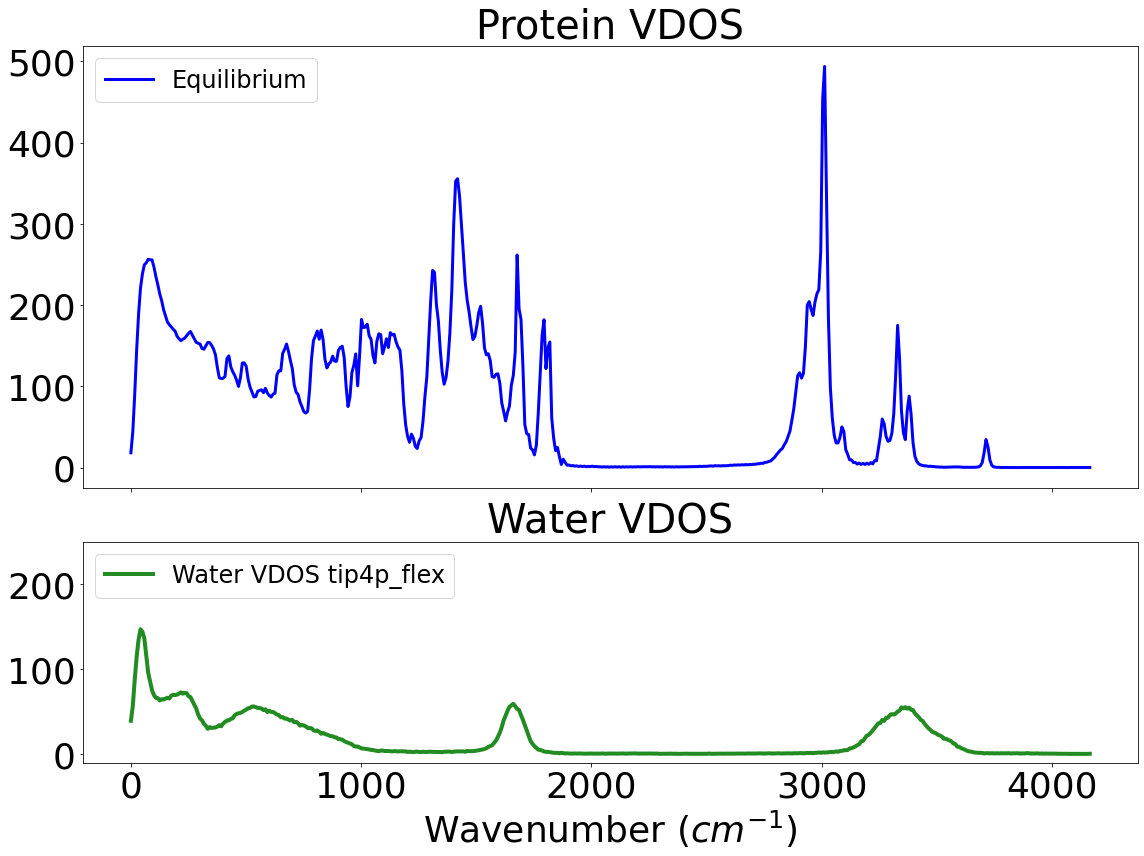

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
# non_equil_data = Read_Two_Column_File('/Users/bdneff/Downloads/non_equil_project/flex_water/tip4p/VDOS/non_equil_VDOS.dat')
# equil_data = Read_Two_Column_File('/Users/bdneff/Downloads/non_equil_project/flex_water/tip4p/VDOS/equil_VDOS.dat')
water_data = np.array(Read_Two_Column_File("/Users/bdneff/Downloads/non_equil_project/flex_water/tip4p/equil/VDOS_water.dat"))

# Normalize data
# norm_non_equil_data = normalize_to_target(non_equil_data[1], normalization_target*10)
# norm_equil_data = normalize_to_target(equil_data[1], normalization_target*10)

# Create a two-panel figure (Panels A and B)
fig, axs = plt.subplots(2, 1, figsize=(16, 12), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# Panel A: Equilibrium and Non-Equilibrium VDOS
#axs[0].plot(non_equil_data[0], norm_non_equil_data, color='red', label='Non-Equilibrium', linewidth=6)
axs[0].plot(equil_data[0], norm_equil_data, color='blue', label='Equilibrium', linewidth=3)
axs[0].legend(fontsize=24, loc='upper left')
axs[0].set_title("Protein VDOS", fontsize=40)
axs[0].tick_params(axis='both', labelsize=36)

# Panel B: Water VDOS
axs[1].plot(water_data[0], water_data[1], color='forestgreen', linewidth=4, label='Water VDOS tip4p_flex')
axs[1].legend(fontsize=24, loc='upper left')
axs[1].set_xlabel("Wavenumber ($cm^{-1}$)", fontsize=36)
axs[1].set_title("Water VDOS", fontsize=40)
axs[1].tick_params(axis='both', labelsize=36)
axs[1].set_ylim(-10, 250)

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('/Users/bdneff/Desktop/VDOS_combined.png', dpi=250)


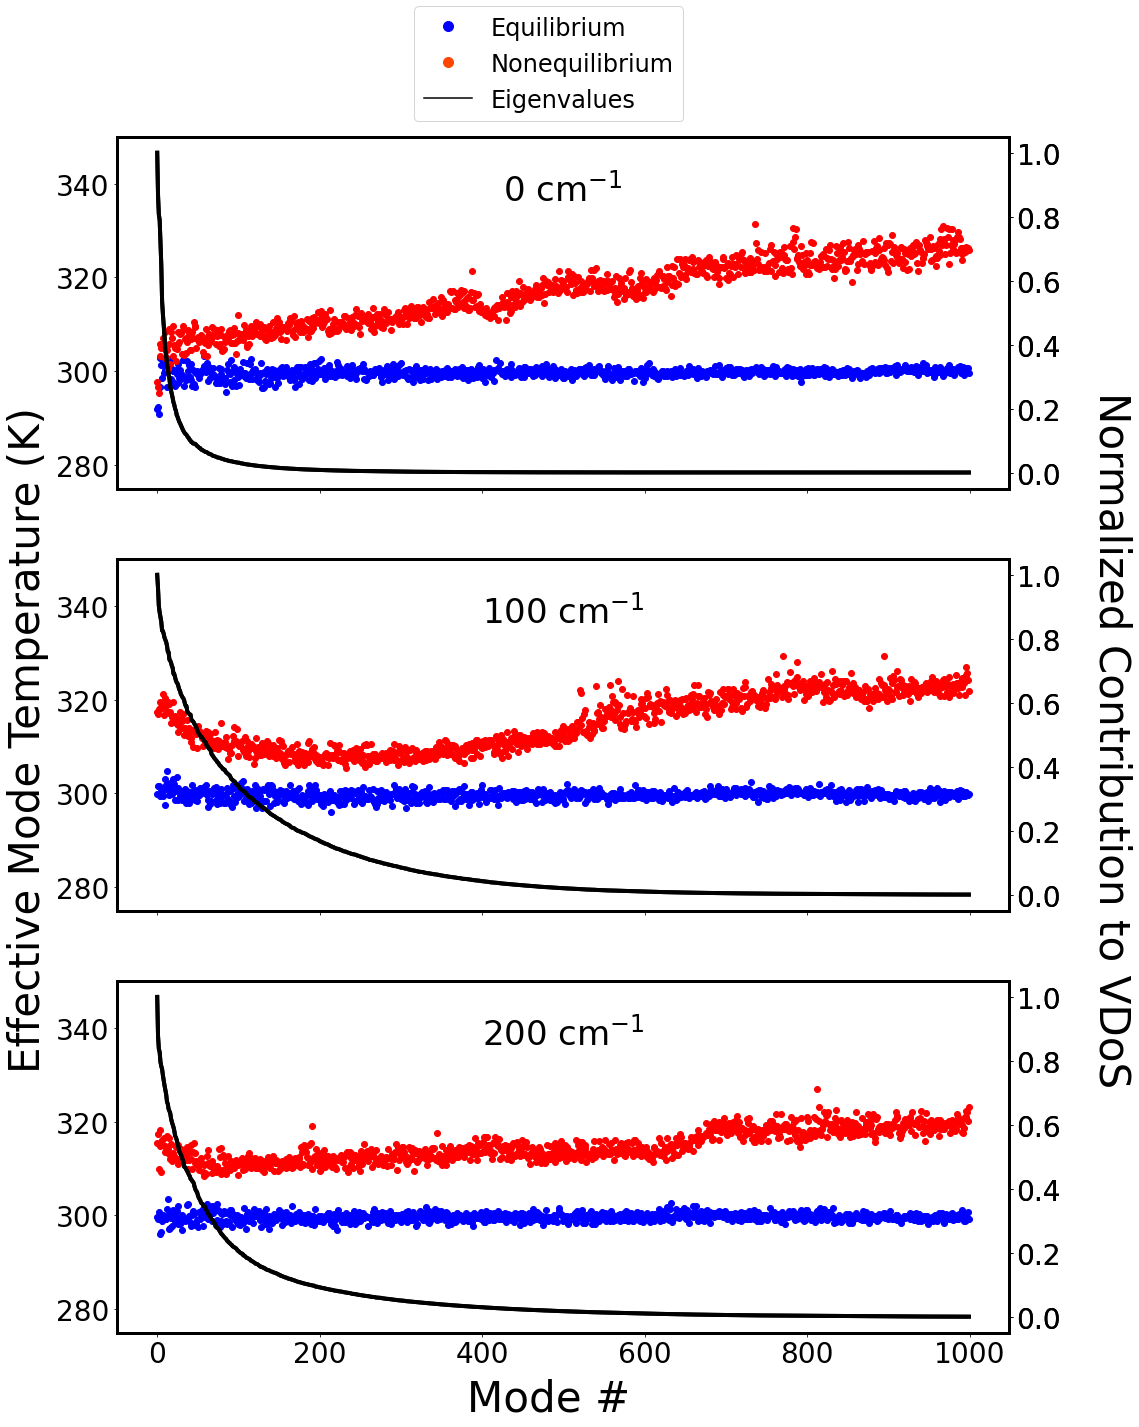

In [104]:
def load_data(path):
    return np.loadtxt(path)

def plot_combined_vdos():
    # Define paths
    paths = [
        ('/Users/bdneff/Downloads/non_equil_project/1d_vdos/equil/freq1_1d_vdos.dat',
         '/Users/bdneff/Downloads/non_equil_project/1d_vdos/non_equil/freq1_1d_vdos.dat',
         0, "0 $\mathrm{cm}^{-1}$"),
        
        ('/Users/bdneff/Downloads/non_equil_project/1d_vdos/equil/freq11_1d_vdos.dat',
         '/Users/bdneff/Downloads/non_equil_project/1d_vdos/non_equil/freq11_1d_vdos.dat',
         12, "100 $\mathrm{cm}^{-1}$"),
        
        ('/Users/bdneff/Downloads/non_equil_project/1d_vdos/equil/freq23_1d_vdos.dat',
         '/Users/bdneff/Downloads/non_equil_project/1d_vdos/non_equil/freq23_1d_vdos.dat',
         24, "200 $\mathrm{cm}^{-1}$")
    ]
    
    evals_path = "/Users/bdneff/Downloads/non_equil_project/flex_water/tip4p/VDOS/eval_covar_fres_coars_test.out.mmat.dat"
    evals_data = load_data(evals_path)
    
    fig, axes = plt.subplots(nrows=3, figsize=(16, 22), sharex=True)

    
    for ax, (e_path, ne_path, eval_index, title) in zip(axes, paths):
        samp_data = load_data(e_path)
        ne_samp_data = load_data(ne_path)
        
        plot_mmat_energy(ax, samp_data, evals_data, eval_index=eval_index, color='blue')
        ax.text(0.5, 0.9, title, transform=ax.transAxes,
        fontsize=34, ha='center', va='top', bbox=dict(facecolor='white', alpha=0.0))
        plot_mmat_energy(ax, ne_samp_data, evals_data, eval_index=eval_index, color='red')
        ax.spines['top'].set_linewidth(3)
        ax.spines['right'].set_linewidth(3)
        ax.spines['bottom'].set_linewidth(3)
        ax.spines['left'].set_linewidth(3)
        #ax.set_ylabel('Eff. Temp', fontsize=28)
    
    # Create legend markers
    blue_dot = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label='Equilibrium')
    red_dot = mlines.Line2D([], [], color='orangered', marker='o', linestyle='None', markersize=10, label='Nonequilibrium')
    #equil_line = mlines.Line2D([], [], color='blue', linestyle='--', markersize=10, label="Ave. Equil. Temp.")
    #non_equil_line = mlines.Line2D([], [], color='orange', linestyle='--', markersize=10, label="Ave. Non Equil. Temp.")
    eigen_dot = mlines.Line2D([], [], color='black', marker='none', linestyle='-', markersize=10, label="Eigenvalues")
    
    
    # Place legend on top of the frame
    fig.legend(handles=[blue_dot, red_dot, eigen_dot], loc='upper center', fontsize=24, bbox_to_anchor=(0.5, 0.97), ncol=1)
    fig.supylabel("Effective Mode Temperature (K)", fontsize=42, x=0.03, rotation=90, verticalalignment='center')
    fig.supxlabel("Mode #", fontsize=42, y=0.07, horizontalalignment='center')
    fig.text(0.97, 0.5, "Normalized Contribution to VDoS", fontsize=42, rotation=-90, verticalalignment='center')

    #plt.tight_layout()
    #plt.xlabel("Frequency (cm$^{-1}$)", fontsize=32)
    plt.savefig('/Users/bdneff/Desktop/combined_temps.png')
    plt.show()

# Call the function to generate the plot
plot_combined_vdos()


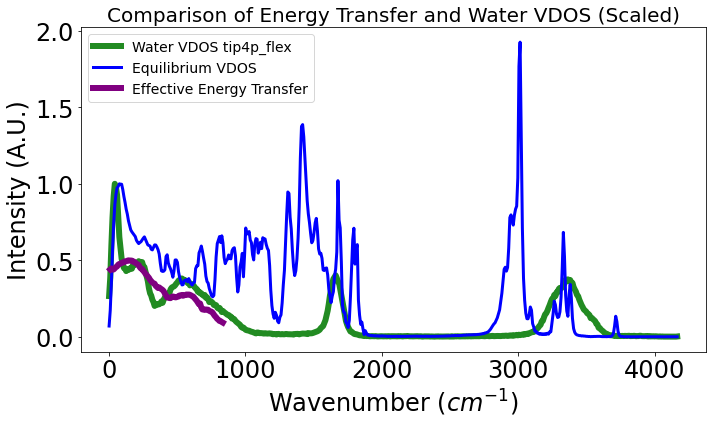

In [106]:
import os
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Constants and Parameters
# -----------------------------
non_equil_T = 326.762
equil_T = 299.944

# -----------------------------
# File Paths
# -----------------------------
#paths to data
evals_path = "/Users/bdneff/Downloads/non_equil_project/flex_water/tip4p/VDOS/eval_covar_fres_coars_test.out.mmat.dat"
water_vdos_path = "/Users/bdneff/Downloads/non_equil_project/flex_water/tip4p/equil/VDOS_water.dat"
equil_vdos_path = "/Users/bdneff/Downloads/non_equil_project/flex_water/tip4p/VDOS/equil_VDOS.dat"

# -----------------------------
# Utility Functions
# -----------------------------
def load_two_column_file(filename):
    return np.loadtxt(filename, unpack=True)

def load_data(filename):
    return np.loadtxt(filename)


# -----------------------------
# Load Static Data
# -----------------------------

evals_data = load_data(evals_path)
equil_vdos = np.array(load_two_column_file(equil_vdos_path))
water_vdos = np.array(load_two_column_file(water_vdos_path))

# -----------------------------
# Process Energy Transfer Files
# -----------------------------
transfer_vals = []

def energy_transf(mmat_data, evals = evals_data, eval_index=0, cmap="viridis", colorbar=False):
    tets = []
    scaling_factor = 10 / (8.3145 * (2500000 ** 2) * (2 * 500 - 1))
    energy_in_each_mode = [(2 * np.sum(mode) - mode[0]) * scaling_factor for mode in mmat_data[1:]]
    eff_trans = 0
    for i in range(len(energy_in_each_mode)):
        eff_trans += (energy_in_each_mode[i] - non_equil_T ) * np.sum(mmat_data[eval_index])
    #print(np.sum(mmat_data[eval_index]))
    return eff_trans

#directory to non_equilibrium_1d_VDoS

directory = "/Users/bdneff/Downloads/non_equil_project/1d_vdos/non_equil/new_data/"
vals = []
for filename in sorted(os.listdir(directory)):  # Ensure consistent ordering
    if filename.endswith("_1d_vdos.dat"):  # Only process relevant files
        # Extract frequency index from filename
        freq = int(''.join(filter(str.isdigit, filename.split("_")[0])))
        filepath = os.path.join(directory, filename)
        ne_samp_data = load_data(filepath)
        transfer_vals.append([freq, energy_transf(ne_samp_data, evals_data, eval_index=freq)])


# Sort by frequency
transfer_vals = sorted(transfer_vals)

# -----------------------------
# Prepare Data for Plotting
# -----------------------------
xs = [freq * freq_res for freq, _ in transfer_vals]  # Convert freq index to cm^-1
ys = [-1 * val for _, val in transfer_vals]      # Flip sign for plotting
ys_norm = np.divide([y / max(abs(v) for v in ys[:100]) for y in ys],2)  # scale first 100 points

scaled_water = water_vdos[1] / np.max(water_vdos[1])

# Normalize reference data
equil_norm = equil_vdos[1] / max(abs(v) for v in equil_vdos[1][:1000])
non_equil_norm = reference_vdos[1] / max(abs(v) for v in reference_vdos[1][:100])

# -----------------------------
# Plotting
# -----------------------------
plt.figure(figsize=(10, 6))

plt.plot(water_vdos[0], scaled_water, color='forestgreen', linewidth=6, label='Water VDOS tip4p_flex')
plt.plot(reference_vdos[0], non_equil_norm, color='blue', linewidth=3, label='Equilibrium VDOS')
plt.plot(xs, ys_norm, color='purple', linewidth=6, label='Effective Energy Transfer')

plt.xlabel('Wavenumber $(cm^{-1})$', fontsize=24)
plt.ylabel("Intensity (A.U.)", fontsize=24)
plt.title('Comparison of Energy Transfer and Water VDOS (Scaled)', fontsize=20)
plt.legend(fontsize=14)
plt.tick_params(axis='both', labelsize=24)
plt.tight_layout()

# Save & show
plt.savefig('/Users/bdneff/Desktop/Combined_Energy_Transfer_VDOS_Normalized.png', dpi=250)
plt.show()
